Dinh Hoang Viet Phuong - 301123263

In [1]:
# Importing TensorFlow and necessary libraries for image data preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Suppressing warnings to keep the output clean and concise
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create Image Data Generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:/Download/Dataset/train/', target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('D:/Download/Dataset/test/', target_size=(150, 150), batch_size=32, class_mode='binary')

Found 11042 images belonging to 2 classes.
Found 11042 images belonging to 2 classes.


In [3]:
# Define a Sequential model for image classification.
# The model consists of Convolutional and MaxPooling layers for feature extraction, followed by Flatten layers for flattening the feature maps, and Dense layers for classification.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
#Train the model
history = model.fit(train_generator, validation_data=test_generator, steps_per_epoch=100, epochs=50, validation_steps=50, verbose=2)

Epoch 1/50
100/100 - 34s - loss: 0.4765 - accuracy: 0.8233 - val_loss: 0.2214 - val_accuracy: 0.9306 - 34s/epoch - 342ms/step
Epoch 2/50
100/100 - 33s - loss: 0.2544 - accuracy: 0.9075 - val_loss: 0.1415 - val_accuracy: 0.9494 - 33s/epoch - 332ms/step
Epoch 3/50
100/100 - 33s - loss: 0.2362 - accuracy: 0.9109 - val_loss: 0.1466 - val_accuracy: 0.9525 - 33s/epoch - 334ms/step
Epoch 4/50
100/100 - 35s - loss: 0.2197 - accuracy: 0.9156 - val_loss: 0.1174 - val_accuracy: 0.9544 - 35s/epoch - 345ms/step
Epoch 5/50
100/100 - 34s - loss: 0.2063 - accuracy: 0.9186 - val_loss: 0.1446 - val_accuracy: 0.9456 - 34s/epoch - 343ms/step
Epoch 6/50
100/100 - 34s - loss: 0.2101 - accuracy: 0.9237 - val_loss: 0.1156 - val_accuracy: 0.9588 - 34s/epoch - 344ms/step
Epoch 7/50
100/100 - 35s - loss: 0.1949 - accuracy: 0.9250 - val_loss: 0.0964 - val_accuracy: 0.9588 - 35s/epoch - 347ms/step
Epoch 8/50
100/100 - 35s - loss: 0.1985 - accuracy: 0.9275 - val_loss: 0.1075 - val_accuracy: 0.9619 - 35s/epoch - 350

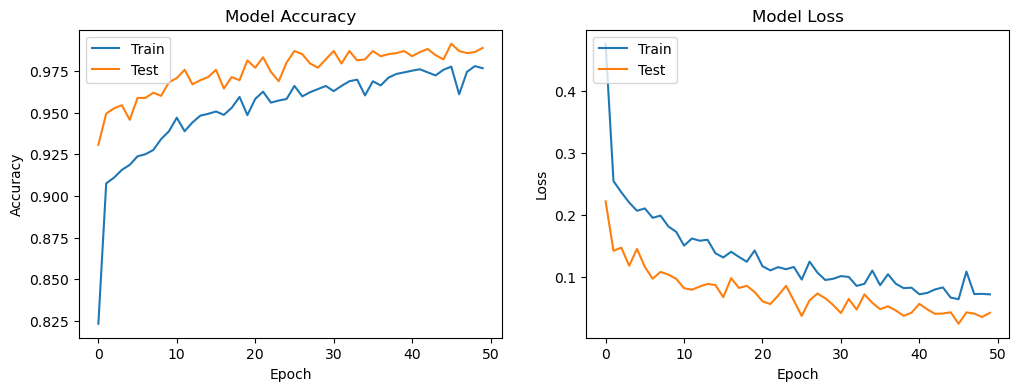

In [6]:
#Plotting training and validation accuracy values and training and validation loss values
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

1/1 [==============================] - 0s 68ms/step


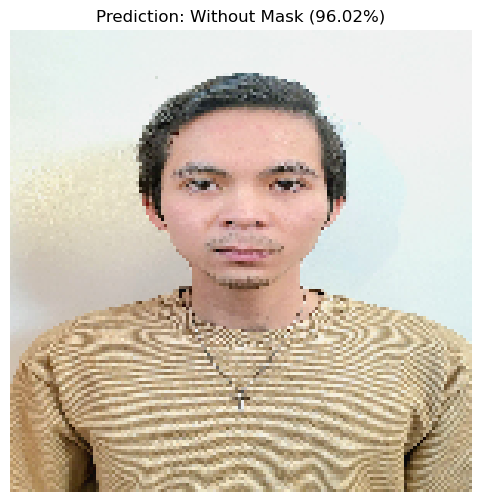

In [7]:
# Define a function: load_and_predict_image to load and predict the class of an image using the trained model
def load_and_predict_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Convert to array
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
    img_tensor /= 255.  # Normalize the image

    # Predict the class (With Mask or Without Mask) using the model
    prediction = model.predict(img_tensor)
    plt.imshow(img)
    plt.axis('off')

    # Display the prediction
    if prediction[0][0] > 0.5:
        plt.title(f'Prediction: With Mask ({prediction[0][0]*100:.2f}%)')
    else:
        plt.title(f'Prediction: Without Mask ({(1 - prediction[0][0])*100:.2f}%)')

# Example usage
image_path = 'D:/Download/Dataset/aaa.jpg'
plt.figure(figsize=(6, 6))
load_and_predict_image(image_path, model)